## PROJECT 123

### PROJECT NAME: Sentiment Analysis On Iphone_4s

### GROUP NUMBER: 03

### TEAM MEMBERS: 

* Deepak Baliram Talekar
* Deepak C N
* Harsh Suvarna
* Krishna Prasad
* Sourav Shivkumar Shukla
* Sowmiya S
* Vrushabh Dipak Patil

### Import the Required Packages

In [1]:
import numpy as np
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt

# For regular expressions
import re

# For handling string
import string

# For performing mathematical operations
import math

#for natural language processing
import nltk
from textblob import TextBlob

In [2]:
# Importing dataset
df=pd.read_excel('C:\\Users\\Admin\\Desktop\\Apple iphone 4s review\\Iphone_4s_Reviews.xlsx') 
print("Shape of data=>",df.shape)

Shape of data=> (36440, 2)


In [3]:
df

,Ratings,Reviews
0,5,Big billion day makes this phone even more val...
1,5,Every thing is fine n more then expected...
2,2,Has many drawbacks. Apps developed for iPhone ...
3,5,The phone was in superb condition... im lovin ...
4,5,Great Product.
...,...,...
36435,5,This product is just amazingðŸ˜™
36436,5,Very tactile\n \n \n\n\n\n
36437,5,Very good according to price and features!! On...
36438,5,Original!! Rest no need to explain.. Apple Nam...


### Removing the Null and missing values

In [4]:
df.isnull().sum()

Ratings      0
Reviews    755
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Ratings    0
Reviews    0
dtype: int64

In [7]:
df

,Ratings,Reviews
0,5,Big billion day makes this phone even more val...
1,5,Every thing is fine n more then expected...
2,2,Has many drawbacks. Apps developed for iPhone ...
3,5,The phone was in superb condition... im lovin ...
4,5,Great Product.
...,...,...
36435,5,This product is just amazingðŸ˜™
36436,5,Very tactile\n \n \n\n\n\n
36437,5,Very good according to price and features!! On...
36438,5,Original!! Rest no need to explain.. Apple Nam...


In [8]:
for i in range(0,len(df)-1):
    if type(df.iloc[i]['Reviews']) != str:
        df.iloc[i]['Reviews'] = str(df.iloc[i]['Reviews'])

In [9]:
df = df[df['Ratings'] != 3]

In [10]:
df

,Ratings,Reviews
0,5,Big billion day makes this phone even more val...
1,5,Every thing is fine n more then expected...
2,2,Has many drawbacks. Apps developed for iPhone ...
3,5,The phone was in superb condition... im lovin ...
4,5,Great Product.
...,...,...
36435,5,This product is just amazingðŸ˜™
36436,5,Very tactile\n \n \n\n\n\n
36437,5,Very good according to price and features!! On...
36438,5,Original!! Rest no need to explain.. Apple Nam...


# Pre-Processing

### Convert the all reviews into the Lower Case.

In [11]:
df['pre_process'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

C:\Users\Admin\AppData\Local\Temp/ipykernel_12032/4215006226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pre_process'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))


### Remove the HTML tags and URLs from the reviews.

In [12]:
from bs4 import BeautifulSoup
df['pre_process']=df['pre_process'].apply(lambda x: BeautifulSoup(x).get_text())
import re
df['pre_process']=df['pre_process'].apply(lambda x: re.sub(r"http\S+", "", x))

C:\Users\Admin\AppData\Local\Temp/ipykernel_12032/3095435998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pre_process']=df['pre_process'].apply(lambda x: BeautifulSoup(x).get_text())
C:\Users\Admin\AppData\Local\Temp/ipykernel_12032/3095435998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pre_process']=df['pre_process'].apply(lambda x: re.sub(r"http\S+", "", x))


### Perform the Contractions on the reviews.

In [13]:
def contractions(s):
 s = re.sub(r"won't", "will not",s)
 s = re.sub(r"would't", "would not",s)
 s = re.sub(r"could't", "could not",s)
 s = re.sub(r"\'d", "would",s)
 s = re.sub(r"can\'t", "can not",s)
 s = re.sub(r"n\'t", " not", s)
 s= re.sub(r"\'re", " are", s)
 s = re.sub(r"\'s", " is", s)
 s = re.sub(r"\'ll", " will", s)
 s = re.sub(r"\'t", " not", s)
 s = re.sub(r"\'ve", " have", s)
 s = re.sub(r"\'m", " am", s)
 return s
df['pre_process']=df['pre_process'].apply(lambda x:contractions(x))

C:\Users\Admin\AppData\Local\Temp/ipykernel_12032/4156889850.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pre_process']=df['pre_process'].apply(lambda x:contractions(x))


## Remove non-alpha characters

In [14]:
df['pre_process']=df['pre_process'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

C:\Users\Admin\AppData\Local\Temp/ipykernel_12032/3873174285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pre_process']=df['pre_process'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))


## Remove the extra spaces between the words

In [15]:
df['pre_process']=df['pre_process'].apply(lambda x: re.sub(' +', ' ', x))

C:\Users\Admin\AppData\Local\Temp/ipykernel_12032/2458256260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pre_process']=df['pre_process'].apply(lambda x: re.sub(' +', ' ', x))


## Remove the stop words by using the NLTK package

In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['pre_process']=df['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

C:\Users\Admin\AppData\Local\Temp/ipykernel_12032/1267665603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pre_process']=df['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))


## Perform lemmatization using the wordnet lemmatizer

In [17]:
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [18]:
def number_to_text(data):
    temp_str = data.split()
    string = []
    for i in temp_str:

    # if the word is digit, converted to
    # word else the sequence continues

        if i.isdigit():
            temp = inflect.engine().number_to_words(i)
            string.append(temp)
        else:
            string.append(i)
    outputStr = " ".join(string)
    return outputStr

In [19]:
ps = PorterStemmer()
def stem_text(data):
    tokens = word_tokenize(data)
    stemmed_tokens = [ps.stem(word) for word in tokens if word not in (stop_words)]
    return " ".join(stemmed_tokens)

In [20]:
lemma = WordNetLemmatizer()
def lemmatiz_text(data):    
    tokens = word_tokenize(data)
    lemma_tokens = [lemma.lemmatize(word, pos='v') for word in tokens if word not in (stop_words)]
    return " ".join(lemma_tokens)

# Creating the TF-IDF model

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(df['pre_process'])

# Creating the Bag of Words model

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(df['pre_process'])

In [48]:
df

,Ratings,Reviews,pre_process,sentiment,word_count,sentiment_category
0,5,Big billion day makes this phone even more val...,big billion day makes phone even valuable,1,7,Positive
1,5,Every thing is fine n more then expected...,every thing fine n expected,1,5,Positive
2,2,Has many drawbacks. Apps developed for iPhone ...,many drawbacks apps developed iphone indian co...,0,59,Neutral
3,5,The phone was in superb condition... im lovin ...,phone superb condition im lovin product,1,6,Positive
4,5,Great Product.,great product,1,2,Positive
...,...,...,...,...,...,...
36435,5,This product is just amazingðŸ˜™,product amazing,1,2,Positive
36436,5,Very tactile\n \n \n\n\n\n,tactile,1,1,Positive
36437,5,Very good according to price and features!! On...,good according price features one best phone p...,1,15,Positive
36438,5,Original!! Rest no need to explain.. Apple Nam...,original rest need explain apple name enough,1,7,Positive


In [49]:
def sentiment(n):
    return 1 if n >= 4 else 0
df['sentiment'] = df['Ratings'].apply(sentiment)
df.head()

C:\Users\Admin\AppData\Local\Temp/ipykernel_12032/3342561078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['Ratings'].apply(sentiment)


,Ratings,Reviews,pre_process,sentiment,word_count,sentiment_category
0,5,Big billion day makes this phone even more val...,big billion day makes phone even valuable,1,7,Positive
1,5,Every thing is fine n more then expected...,every thing fine n expected,1,5,Positive
2,2,Has many drawbacks. Apps developed for iPhone ...,many drawbacks apps developed iphone indian co...,0,59,Neutral
3,5,The phone was in superb condition... im lovin ...,phone superb condition im lovin product,1,6,Positive
4,5,Great Product.,great product,1,2,Positive


In [50]:
# how many words are in the sentence?
df['word_count'] = df['pre_process'].str.split().apply(len)
df['word_count']

C:\Users\Admin\AppData\Local\Temp/ipykernel_12032/240119797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['pre_process'].str.split().apply(len)


0         7
1         5
2        59
3         6
4         2
         ..
36435     2
36436     1
36437    15
36438     7
36439     6
Name: word_count, Length: 34154, dtype: int64

In [51]:
df.sort_values(by='sentiment')

,Ratings,Reviews,pre_process,sentiment,word_count,sentiment_category
9744,2,Phone is getting hang lit bit price is Hight I...,phone getting hang lit bit price hight say buy,0,9,Neutral
16225,2,Phone battery not good In six month battery he...,phone battery good six month battery health pl...,0,9,Neutral
12937,1,dear sir\n\n\nnot received iPhone my received ...,dear sir received iphone received power bank,0,7,Neutral
4234,2,It is not working correctly.. And some times i...,working correctly times get hanging continuos ...,0,9,Neutral
22325,2,"Not earpod in this box ,earphone inside the bo...",earpod box earphone inside box biggest problem...,0,18,Neutral
...,...,...,...,...,...,...
12989,5,Great Product ðŸ‘,great product,1,2,Positive
12988,5,Purchased mobile from Retail outlet. Working A...,purchased mobile retail outlet working awesome...,1,31,Positive
12987,4,"Overall, this is a very practical phone and va...",overall practical phone value money iphone wis...,1,28,Positive
13001,5,I liked how apple is giving a security seal fo...,liked apple giving security seal online orders...,1,26,Positive


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment', ylabel='Density'>

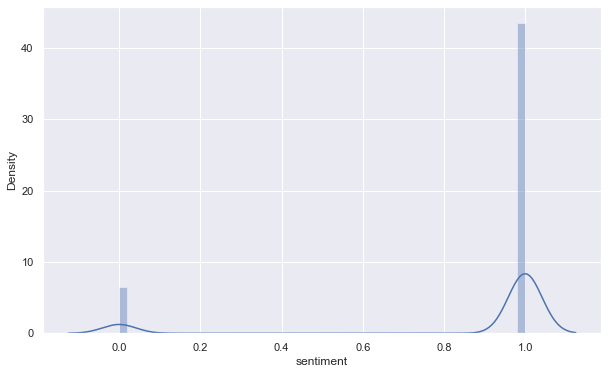

In [52]:
# Checking the distribution of reviews 

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(df['sentiment'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment'>

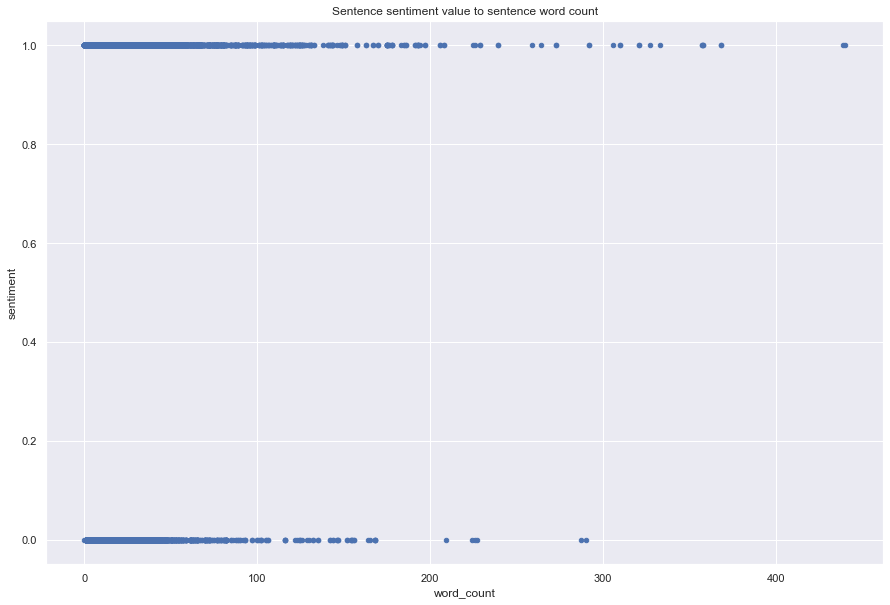

In [53]:
df.plot.scatter(x='word_count', y='sentiment', figsize=(15,10), title='Sentence sentiment value to sentence word count')

In [54]:
# This function will return sentiment category based on values in sentiment_value column

def sentiment_cat(row):
    
    '''This function returns sentiment category based on values in sentiment_value column'''
    
    if row['sentiment'] < 0:
        val = 'Negative'
    elif row['sentiment'] == 0: 
        val = 'Neutral'
    elif row['sentiment'] > 0:
        val = 'Positive'
    else:
        val = -1
    return val

In [55]:
#Applying the function in our new column
df['sentiment_category'] = df.apply(sentiment_cat, axis=1)
df.head()

C:\Users\Admin\AppData\Local\Temp/ipykernel_12032/4290529297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_category'] = df.apply(sentiment_cat, axis=1)


,Ratings,Reviews,pre_process,sentiment,word_count,sentiment_category
0,5,Big billion day makes this phone even more val...,big billion day makes phone even valuable,1,7,Positive
1,5,Every thing is fine n more then expected...,every thing fine n expected,1,5,Positive
2,2,Has many drawbacks. Apps developed for iPhone ...,many drawbacks apps developed iphone indian co...,0,59,Neutral
3,5,The phone was in superb condition... im lovin ...,phone superb condition im lovin product,1,6,Positive
4,5,Great Product.,great product,1,2,Positive


In [56]:
df['sentiment_category'].value_counts()

Positive    29746
Neutral      4408
Name: sentiment_category, dtype: int64

In [57]:
# Maximum sentiment value
df['sentiment'].max()

1

In [58]:
# review which is having max sentiment value
df[df['sentiment']==1.0].head(2)

,Ratings,Reviews,pre_process,sentiment,word_count,sentiment_category
0,5,Big billion day makes this phone even more val...,big billion day makes phone even valuable,1,7,Positive
1,5,Every thing is fine n more then expected...,every thing fine n expected,1,5,Positive


In [59]:
# minimum sentiment value
df['sentiment'].min()

0

In [60]:
# review which is having min sentiment value
df[df['sentiment']==0].head(2)

,Ratings,Reviews,pre_process,sentiment,word_count,sentiment_category
2,2,Has many drawbacks. Apps developed for iPhone ...,many drawbacks apps developed iphone indian co...,0,59,Neutral
10,1,One day delivery\n \n \n\n\n\n,one day delivery,0,3,Neutral


In [61]:
# Sentiment score of the whole review
df['sentiment'].describe()

count    34154.000000
mean         0.870938
std          0.335274
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: sentiment, dtype: float64

In [62]:
df.head()

,Ratings,Reviews,pre_process,sentiment,word_count,sentiment_category
0,5,Big billion day makes this phone even more val...,big billion day makes phone even valuable,1,7,Positive
1,5,Every thing is fine n more then expected...,every thing fine n expected,1,5,Positive
2,2,Has many drawbacks. Apps developed for iPhone ...,many drawbacks apps developed iphone indian co...,0,59,Neutral
3,5,The phone was in superb condition... im lovin ...,phone superb condition im lovin product,1,6,Positive
4,5,Great Product.,great product,1,2,Positive


In [63]:
Data_models = pd.DataFrame(columns = ['Model','Train_Accuracy','Test_Accuracy'])

# Model Building

In [64]:
X = df['pre_process']
y = df['sentiment']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [66]:
y_test

34562    0
1236     1
18718    1
22654    1
4330     0
        ..
28850    1
13053    1
20023    1
2999     1
18892    1
Name: sentiment, Length: 8539, dtype: int64

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000,solver='saga')
logistic_model.fit(ctmTr,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=1000, solver='saga')

In [73]:
# PERFORMING MODEL TESTING AND MODEL EVALUATION

#training dataset
y_pred_train=logistic_model.predict(ctmTr)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy :",accuracy_score(y_train,y_pred_train))
print('Classification Report:\n',classification_report(y_train,y_pred_train))
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))

Accuracy : 0.9708373999609604
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.88      3313
           1       0.97      0.99      0.98     22302

    accuracy                           0.97     25615
   macro avg       0.96      0.90      0.93     25615
weighted avg       0.97      0.97      0.97     25615

Confusion Matrix:
 [[ 2693   620]
 [  127 22175]]


In [75]:
#test data
y_pred_test=logistic_model.predict(X_test_dtm)
y_pred_test

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy :",accuracy_score(y_test,y_pred_test))
print('Classification Report:\n',classification_report(y_test,y_pred_test))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))

Accuracy : 0.9565522894952571
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.81      1095
           1       0.96      0.99      0.98      7444

    accuracy                           0.96      8539
   macro avg       0.93      0.87      0.90      8539
weighted avg       0.96      0.96      0.95      8539

Confusion Matrix:
 [[ 816  279]
 [  92 7352]]


In [77]:
logistic_model_train =accuracy_score(y_train,y_pred_train)
logistic_model_test=accuracy_score(y_test,y_pred_test)

Data_models.loc[1,'Model'] = 'Logistic Regression'
Data_models.loc[1,"Train_Accuracy"] = logistic_model_train
Data_models.loc[1,"Test_Accuracy"] = logistic_model_test

# 2 KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier(n_neighbors=5)

In [80]:
knn.fit(ctmTr,y_train)

KNeighborsClassifier()

In [81]:
y_pred_test_knn = knn.predict(X_test_dtm)

In [82]:
y_pred_train_knn  =  knn.predict(ctmTr)

In [83]:
print("Training Accuracy :",accuracy_score(y_train,y_pred_train_knn))
print("Testing Accuracy : ",accuracy_score(y_test, y_pred_test_knn))

Training Accuracy : 0.9287917235994535
Testing Accuracy :  0.9083030799859468


In [84]:
knn_train =accuracy_score(y_train,y_pred_train_knn)
knn_test=accuracy_score(y_test, y_pred_test_knn)

Data_models.loc[4,'Model']          = 'KNN'
Data_models.loc[4,"Train_Accuracy"] = knn_train
Data_models.loc[4,"Test_Accuracy"]  = knn_test

# 4.Decison Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 123,ccp_alpha=0.0010 )
dt_classifier_gini.fit(ctmTr, y_train)
DecisionTreeClassifier(ccp_alpha=0.001, random_state=123)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=123)

In [86]:
## USING ENTROPY PERFORMIG MODEL TRAINING 

y_pred_train_gini=dt_classifier_gini.predict(ctmTr)
y_pred_train_gini

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [87]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy :",accuracy_score(y_train,y_pred_train_gini))
print("classification_report:",classification_report(y_train,y_pred_train_gini))
print("confusion_matrix:",confusion_matrix(y_train,y_pred_train_gini))

Accuracy : 0.9011907085691977
classification_report:               precision    recall  f1-score   support

           0       0.67      0.46      0.55      3313
           1       0.92      0.97      0.94     22302

    accuracy                           0.90     25615
   macro avg       0.80      0.71      0.75     25615
weighted avg       0.89      0.90      0.89     25615

confusion_matrix: [[ 1524  1789]
 [  742 21560]]


In [88]:
#TEST DATA
y_pred_test_gini=dt_classifier_gini.predict(X_test_dtm)
y_pred_test_gini

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [89]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy:",accuracy_score(y_test,y_pred_test_gini))
print("classification_report:",classification_report(y_test,y_pred_test_gini))
print("confusion_matrix:",confusion_matrix(y_test,y_pred_test_gini))

Accuracy: 0.8981145333177187
classification_report:               precision    recall  f1-score   support

           0       0.65      0.44      0.53      1095
           1       0.92      0.97      0.94      7444

    accuracy                           0.90      8539
   macro avg       0.79      0.70      0.73      8539
weighted avg       0.89      0.90      0.89      8539

confusion_matrix: [[ 483  612]
 [ 258 7186]]


In [90]:
decision_tree_model_train =accuracy_score(y_train,y_pred_train_gini)
decision_tree_model_test=accuracy_score(y_test,y_pred_test_gini)

Data_models.loc[5,'Model'] = 'Decision Tree (Gini)'
Data_models.loc[5,"Train_Accuracy"] = decision_tree_model_train
Data_models.loc[5,"Test_Accuracy"] = decision_tree_model_test

# 5. Naive Bayes Classifier

In [91]:
from sklearn.naive_bayes import MultinomialNB

In [92]:
naive_bayes=MultinomialNB()
naive_bayes_classifier=naive_bayes.fit(ctmTr, y_train)
naive_bayes_classifier

MultinomialNB()

In [94]:
y_pred_test_nbc=naive_bayes_classifier.predict(X_test_dtm)
y_pred_test_nbc

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [95]:
y_pred_train_nbc=naive_bayes_classifier.predict(ctmTr)
y_pred_train_nbc

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [96]:
print("Training Accuracy :",accuracy_score(y_train,y_pred_train_nbc))
print("Testing Accuracy : ",accuracy_score(y_test, y_pred_test_nbc))

Training Accuracy : 0.9490532890884248
Testing Accuracy :  0.9392200491860874


In [97]:
nbc_train =accuracy_score(y_train,y_pred_train_nbc)
nbc_test=accuracy_score(y_test, y_pred_test_nbc)

Data_models.loc[3,'Model'] = 'NAIVE BAYES'
Data_models.loc[3,"Train_Accuracy"] = nbc_train
Data_models.loc[3,"Test_Accuracy"] = nbc_test

# All Model Accuracy

In [98]:
Data_models["Train_Accuracy"] = Data_models["Train_Accuracy"]
Data_models["Test_Accuracy"]  = Data_models["Test_Accuracy"]
Data_models

,Model,Train_Accuracy,Test_Accuracy
1,Logistic Regression,0.970837,0.956552
4,KNN,0.928792,0.908303
5,Decision Tree (Gini),0.901191,0.898115
3,NAIVE BAYES,0.949053,0.93922
